# <span style='color:deepskyblue'> Cosmology MCMC notebook </span>

## <span style='color:deepskyblue'>Preliminaries</span>

In [31]:
# Install required packages (if not available on server)
!pip3 install getdist

import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

## <span style='color:deepskyblue'> The $\Lambda$CDM Model </span>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$

$$
H \equiv \frac{\dot a}{a}
$$

The Einstein Equations in a **homogeneous, isotropic** Universe have an especially simple form and a special name, **Friedmann Equation**:

$$
H^2 = \frac{8\pi G}{3}\rho + \frac{k}{a^2}
$$

where $\rho$ is the total energy density of the Universe (at a certain time or size), and $k$ is a universal constant related to the [spatial curvature and shape of the Universe](https://en.wikipedia.org/wiki/Shape_of_the_universe#:~:text=The%20spatial%20curvature%20is%20related,indistinguishable%20spaces%20with%20different%20topologies.). In the $\Lambda$CDM model, this additionally simplifies to

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
\qquad
\qquad
\Omega_m + \Omega_\Lambda + \Omega_k = 1
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. Note that only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
H_0 \equiv h\,\frac{100 \text{km}}{\text{s Mpc}}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{16}$ m. 

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

In [3]:
# Defining the unit parsec in meters
PARSEC = 3.086 * 10**16 #meters

# Defining the constant H0
def H0(h):
    return h*10**5/PARSEC # returns H0 in terms of s-1

# Defining Hubble rate function
def Hubble(z, Omega_L, Omega_m, h):
    Omega_k = 1 - Omega_L - Omega_m # Omega_k is given as a function of Omega_L and Omega_m to decrease the number of free parameters
    # This also makes sure the relationship between these values is preserved
    return H0(h) * np.sqrt(Omega_L + Omega_k * (1+z)**2 + Omega_m * (1+z)**3) 


##  <span style='color:deepskyblue'>Supernovae Ia</span>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

While photons (light rays) travel from the distant SNIa to Earth, the Universe expands and the photons get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$

We can express the luminosity distance in terms of the Hubble rate:

$$ 
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times 
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \sinh\left(\sqrt{\Omega_k}D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \sin\left(\sqrt{-\Omega_k}D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.

We can create the function `dL(z, h, Omega_m, Omega_L)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in km/s/Mpc!

<span style='color:purple'>My version of the code uses $H_0$ measured in 1/s, so I adjusted the rest of the formulae to produce results with the correct order of magnitude. </span>

In [4]:
c = 2.998 * 10**8 # Speed of light in m/s

# This function calculates the luminosity distance
def theory_dL(z, Omega_L, Omega_m, h):
    # Define the function D(z)
    Dz = H0(h) * integrate.quad(lambda z: 1/Hubble(z, Omega_L, Omega_m, h), 0, z)[0]
    # Define Omega_k in terms of Omega_L and Omega_m
    Omega_k = 1. - Omega_L - Omega_m
    # Determine the last factor term based on the Omega_k
    if Omega_k > 0:
        factor = 1/np.sqrt(Omega_k) * np.sinh(np.sqrt(Omega_k)*Dz)
    elif Omega_k == 0:
        factor = Dz
    else:
        factor = 1/np.sqrt(-Omega_k) * np.sin(np.sqrt(-Omega_k)*Dz)
    return c/PARSEC/H0(h)/10**6 * (1+z) * factor # returns dL in pc

# This function calculates the distance modulus
def theory_modulus (z, Omega_L, Omega_m, h):
    return 5 * np.log10(theory_dL(z, Omega_L, Omega_m, h)*10**11)

## <span style='color:deepskyblue'>The Union2.1 Compilation</span>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$ and [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$ (and corresponding errors $\delta\mu$), defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [5]:
dataloc = "SCPUnion2.1_mu_vs_z.txt" # The data file is downloaded and the filepath is given here

# Reads in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]

data = np.genfromtxt(dataloc) # This numpy array holds the data

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
print(data[0])

[           nan 2.84880000e-02 3.53465834e+01 2.23905933e-01
 1.28418942e-01]


In [6]:
# This block pulls out the redshifts (zs), distance modulus (dist_mod) and magnitude estimated errors (err_dist_mod) into separate numpy arrays

zs = data.T[1] # redshift
dist_mod = data.T[2] # distance modulus
err_dist_mod = data.T[3] # errors on distance modulus

In [7]:
# Let's look at the data, just for fun. 
# We can look both at the raw data (distance modulus) or calculate the luminosity distance
# Note that Numpy allows us to manipulate whole arrays at once

# luminosity distance in pc
dpc = 10. * 10.**(dist_mod / 5.)

# and in Mpc
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))

<span style='color:purple'> The following code block was a testing round for me to see if my modeling functions worked properly. I created a few random data points based on my functions and stored them in separate arrays. Then I plotted these points against the actual data taken from the provided webpage to see if they were consistent. </span>


In [32]:
# This block creates data points based on the defined functions to see if the models match with the data
x_data = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
fake_data_dL= []
fake_data_modulus = []

for i in x_data:
    fake_data_dL.append(theory_dL(i, 1.3, 0.2, 0.7)*10**6)
    fake_data_modulus.append(theory_modulus(i, 1.3, 0.2, 0.7))

<span style='color:purple'> These points do not accurately follow the data as can be seen below. This is because the parameters picked for the functions while generating them were randomly chosen. The goal of this program is to identify the best-suited parameter values. </span>


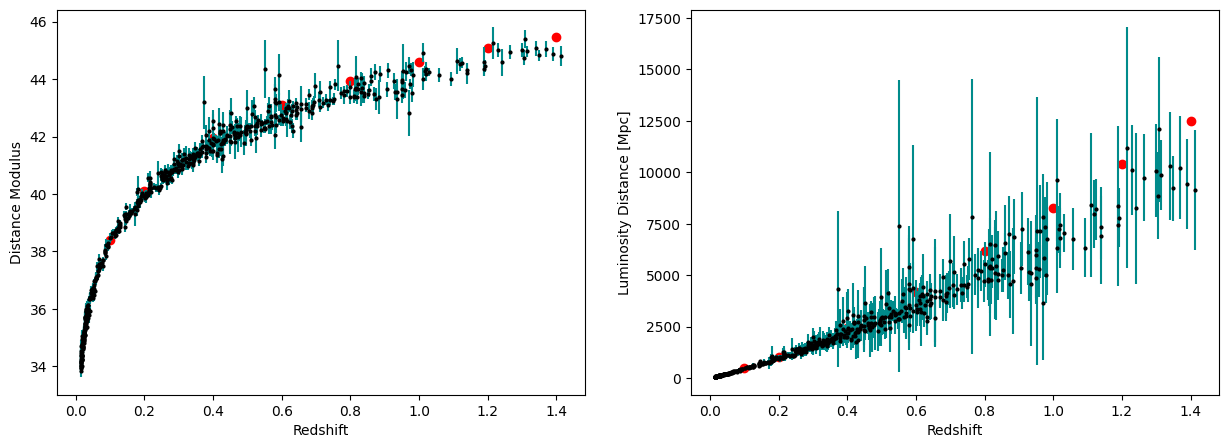

In [33]:
plt.subplots(1, 2, figsize=(15, 5))

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='.', color='black', ecolor='darkcyan', markersize=4)
plt.scatter(x_data,fake_data_modulus, color="red") # simulated dL values plotted with the data

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='.', color='black', ecolor='darkcyan', markersize=4)
plt.scatter(x_data,fake_data_dL, color="red") # simulated distance modulus values plotted with the data

plt.show()

## <span style='color:deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</span>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*). 
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$. 
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <span style='color:deepskyblue'>Prior</span>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.). 

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <span style='color:deepskyblue'>Likelihood</span>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood. 

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not that unusual in physics, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than $10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <span style='color:deepskyblue'>Evidence</span>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <span style='color:deepskyblue'>Posterior</span>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <span style='color:deepskyblue'>Markov-Chain Monte Carlo</span>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied. 
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (4), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)
 
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values)
* Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$
* Draw a random number $r \in [0,1]$
* Accept the step if 
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$
* If accepted, update $ \theta_{\rm old} = \theta_{\rm prop} $, and record; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Repeat

<span style='color:purple'> This given step-wise algorithm is turned into code in the following block. I found it more straightforward to use the parameters separately rather than defining them in a 3-tuple. The proposal of new parameters is through adding a small amount of deviation determined from a Gaussian distribution to the inital values. The standard deviation for the Gaussian distribution is kept small to avoid overflow in the later steps of the algorithm. The </span> $$ \frac{P(\theta)_{prop}}{P(\theta)_{old}} $$ <span style='color:purple'> fraction in the accepting condition step is accepted to be 1 since these probabilies have uniform distribution.

I got the idea to put MCMC chain length as a separate variable from Laura Bryan. Adding a line to test the physical accuracy of the proposed values was taken from ChatGPT, since $\Omega_m$ and $\Omega_\Lambda$ values cannot be negative. $\Omega_k$ can be negative (as given in the definition of $D(z)$) but for the sake of accuracy I set an upper limit as for the sum $\Omega_m + \Omega_\Lambda$. It is worth noting that for the case where the initial parameters are given close to the known best values with very small changes, this bound may not be critically important. </span> 


In [39]:
# Declaring inital values for parameters
h_old = 0.6
Omegam_old = 0.3
OmegaL_old = 0.6
chisqr_old = 0.

dist_mod_old = [] # Array to hold the modeled distance modulus values
dist_mod_prop = [] # Array to hold the proposed distance modulus values

chisqr_prop = 0.

# Calculating theoretical distance moduli for all redshift data
for i in zs:
    dist_mod_old.append(theory_modulus(i, OmegaL_old, Omegam_old, h_old))
# Corresponding chi-squared calculation
for j in range(580):
    chisqr_old += (dist_mod_old[j] - dist_mod[j])**2 / (err_dist_mod[j]**2)


MCMC_length = 100 # Put in the number of new value trials desired

best_chisqr = chisqr_old
best_parameters = []

print("#h", "#Omega_m", "#Omega_L")

# The algorithm will repeat the proposal and evaluation for MCMC_length times
for n in range(MCMC_length):
    # Pick a random new value for the variables
    h_prop = h_old + np.random.normal(loc = 0., scale = 0.01) # Random small change to h
    Omegam_prop = Omegam_old + np.random.normal(loc = 0., scale = 0.01) # Random small change to Omegam
    OmegaL_prop = OmegaL_old + np.random.normal(loc = 0., scale = 0.01) # Random small change to OmegaL
    
    # Bounds for the proposed values
    if Omegam_prop < 0 or OmegaL_prop < 0 or Omegam_prop + OmegaL_prop > 1.3:
        continue # so that there is a higher accuracy and the new variables fit physical reality

    # Renewed calculation for distance moduli based on the proposed parameters
    for k in zs:
        dist_mod_prop.append(theory_modulus(k, OmegaL_prop, Omegam_prop, h_prop))
    # and the corresponding chi squared value
    for w in range(580):
        chisqr_prop += (dist_mod_prop[w] - dist_mod[w]) **2 / (err_dist_mod[w] ** 2)
        
    # Acceptance condition for the new parameters 
    
    r = np.random.uniform(0,1) # Picks random float between 0 and 1
    test = np.exp((chisqr_old - chisqr_prop)/2) # Calculates the likelihood ratio of the old/new parameters
    
    # If the likelihood ratio is greater than a random float the new set of parameters is accepted
    if r < test:
        h_old = h_prop
        Omegam_old = Omegam_prop
        OmegaL_old = OmegaL_prop
        chisqr_old = chisqr_prop
    # otherwise the algorithm will continue with the initial values
    
    # If the new parameters produce a smaller chi-squared statistic accept those values as the best combination
    if chisqr_prop < best_chisqr:
        best_parameters = [h_prop, Omegam_prop, OmegaL_prop] # store them in a list
        chisqr_prop = best_chisqr # update the best chi-squared value as the smaller one
    
    chisqr_prop = 0.0 # Resets the proposed chi squared value for the next set of proposed parameters
    dist_mod_prop = [] # Resets the proposed distance modulus values for the next iteration
    
    print(h_old, Omegam_old, OmegaL_old)

print("Best fit parameters:")
print(best_parameters)

#h #Omega_m #Omega_L
0.6095604314839561 0.30619049095917955 0.5878928903537115
0.6287558424823374 0.29549191748668746 0.5898376067175645
0.6287558424823374 0.29549191748668746 0.5898376067175645
0.6382000261406668 0.2874397402472338 0.5781350370278241
0.6382000261406668 0.2874397402472338 0.5781350370278241
0.6382000261406668 0.2874397402472338 0.5781350370278241
0.6382000261406668 0.2874397402472338 0.5781350370278241
0.6382000261406668 0.2874397402472338 0.5781350370278241
0.6382120448872561 0.3091136453144967 0.5811609421706843
0.6439713663509293 0.29499994794077145 0.5851465155737368
0.6694897523324649 0.29794733095836873 0.5977779782685695
0.6757163034244609 0.3119846599214997 0.5920949618235739
0.6803824526594769 0.31512030319750506 0.5951344327752907
0.6803824526594769 0.31512030319750506 0.5951344327752907
0.6797370262531777 0.3213402462402207 0.5898283591490132
0.6823891650281242 0.33651930335466657 0.6142720842673495
0.6848014461452538 0.3299689627728868 0.6121298628658886
0.

After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h   
 0.297     0.703    69.8
 0.285     0.715    70.1
 0.288     0.712    69.9
 ...
`

## <span style='color:deepskyblue'>Plotting: GetDist</span>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

Removed no burn in


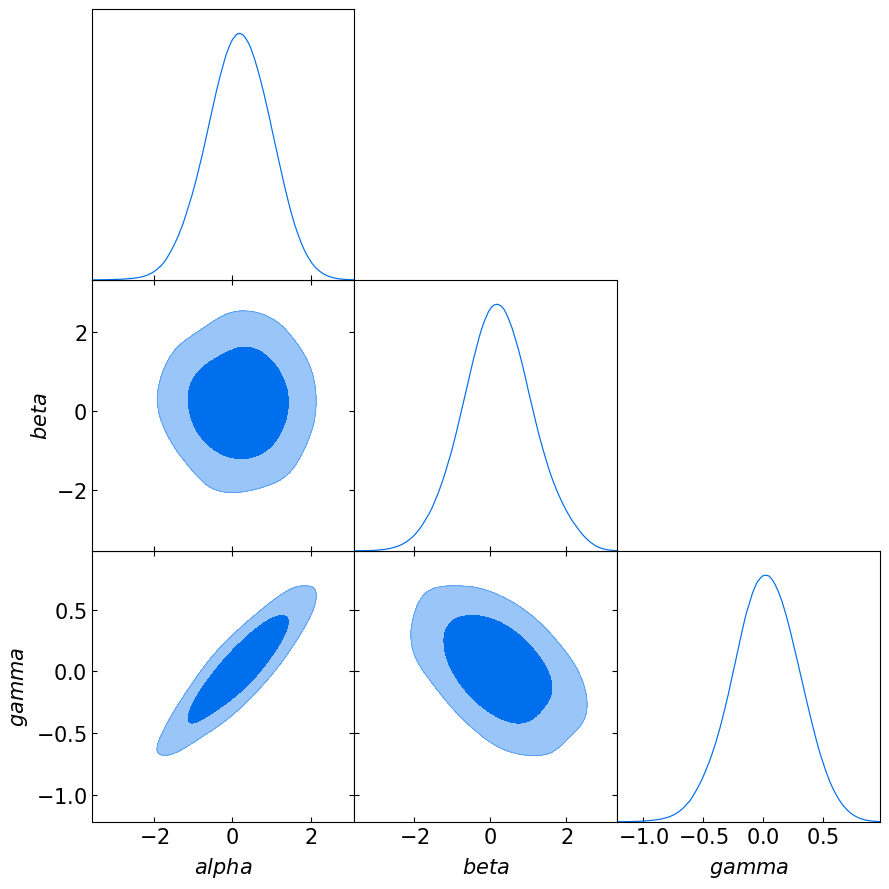

In [38]:
import getdist, IPython
from getdist import plots, MCSamples, loadMCSamples
#print('Version: ',getdist.__version__)
import numpy as np
import matplotlib.pyplot as plt # Changed pylab to pyplot since the documentation mentions that it is an out of date interface

# Random library allows for pre-defined random selection functions
from random import random 
from random import gauss
# If you want to use LaTeX in the labels. Not mandatory, but it looks nice ;)
plt.rc('text',usetex=False) 
#
# Latex has to be downloaded to the device in my case, so I've elected to disable it for this notebook
# might be working differently in the cluster


my_length = 1000; # Variable set to an integer
par1, par2 = [], [] # Two empty arrays defined

m1, m2, s1, s2 = random(), random(), random(), random() # Random numbers assigned to be two sets of mean and standard deviation values

for i in range(my_length): # This loop repeats as the desired number of times set as my_length
    par1.append(gauss(m1, s1)) # Adds a randomly selected number to par1 array based on one of the Gaussian distributions defined by the mean and  stdev selected above
    par2.append(gauss(m2, s2)) # The same thing for par2 with the other defined Gaussian distribution

# Turn the predefined arrays into numpy arrays
par1 = np.array(par1)
par2 = np.array(par2)
# Create another array with some random combination of par1 and par2
par3 = (-0.5 + random()) * par1 + (-0.5 + random()) * par2

# Define names and labels for the plots
my_labels = ["alpha", "beta", "gamma"]
my_names = ['name1', 'name2', 'name3']

# Create a new array out of the three sets of generated data
my_samples = np.array([par1, par2, par3])

# Set the dimension of the final array desired (3 for three lists of values)
my_dim = 3

# First reshapes my_samples to ensure there are three one dimensional entries
# then reorders the entries to make it a regular one dimensional array
my_samples = np.transpose(np.reshape(my_samples,(my_dim,int(my_samples.size/my_dim))))

# Create a variable that includes the data, labels and names to plot
samples1 = MCSamples(samples = my_samples, labels = my_labels, names = my_names)

# Triangle corner plot
j = plots.getSubplotPlotter(subplot_size=3)
j.settings.axes_labelsize = 16
j.settings.axes_fontsize = 16
j.triangle_plot(samples1, filled = True)


<span style='color:purple'> The output of sort() function was checked from the following webpage: https://www.geeksforgeeks.org/python-sorted-function/ to include in the comments. </span>
<span style='color:purple'>
I elected to use my version of functions to plot due to the possible inconsistency in units and order of magnitude. The red line represents the model function obtained using the best parameters determined by the MCMC algorithm. </span>

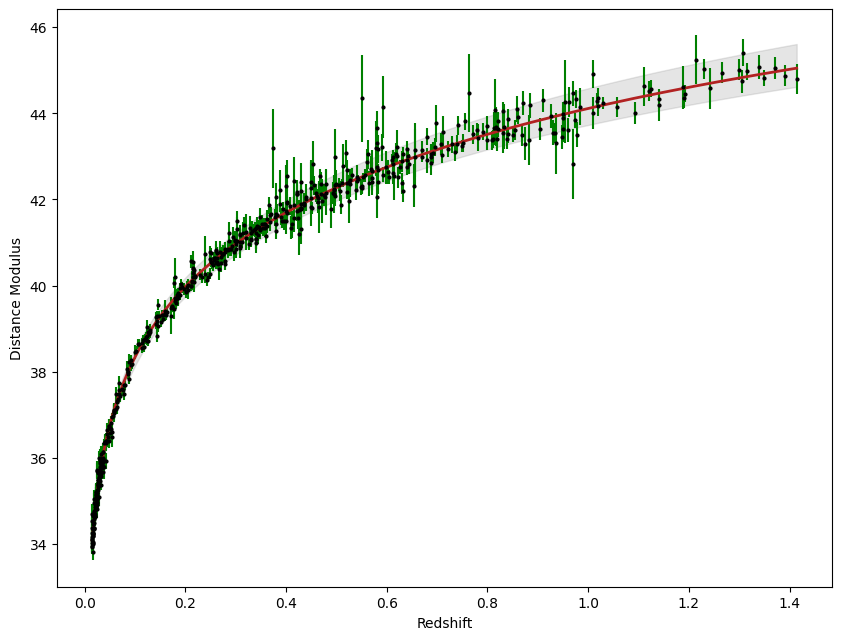

In [40]:
# example of theoretical curves
SPEED_OF_LIGHT = 299792.458 # in km/s

# Still need to add Omega_k!
def theor_luminosity_distance(z, h, OmegaM, OmegaL):
    return 10.**6 * SPEED_OF_LIGHT / h * (1.+z) * \
    integrate.quad(lambda x: 1. / np.sqrt(OmegaM * (1.+x)**3 + OmegaL), 0., z)[0]
    
def theor_distance_modulus(z, h, OmegaM, OmegaL):
    return 5. * (-1. + np.log10(theor_luminosity_distance(z, h, OmegaM, OmegaL)))
               
# Sort the redshift data in increasing order  
zsort = sorted(zs)

# Define three arrays to hold datapoints for three different curves
d_best_fit, d_min, d_max = [], [], []

# d_best_fit uses the ideal parameter combination found through the MCMC chain in the code-block above
for z in zsort:
    d_best_fit.append(theory_modulus(z, best_parameters[2], best_parameters[1], best_parameters[0]))
    d_min.append(theor_distance_modulus(z, 75., 0.5, 0.5))
    d_max.append(theor_distance_modulus(z, 65., 0.1, 0.9))

# Determining the size of the image and naming the axes
plt.subplots(figsize=(10, 7.5))
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")

# Plots the distance modulus datapoints with the error bars using the arrays defined before
plt.errorbar(zs, dist_mod, yerr=err_dist_mod,\
             fmt='.', color='black', ecolor='green', markersize=4)
plt.plot(zsort, d_best_fit, color='firebrick',linewidth=2.) # Plots the modeled curve based on d_best_fit entries
plt.fill_between(zsort, d_min, d_max, color='grey', alpha=.2) # Plots the error margin based on the pre-defined bounds as given above